# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants
around the world. It centralizes power plant data to make it easier to navigate, compare and
draw insights for one’s own analysis. The database covers approximately 35,000 power plants
from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste,
geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and
entries contain information on plant capacity, generation, ownership, and fuel type. It will be
continuously updated as data becomes available.

* more details about this project --> https://github.com/ksingh9398/Internship-Project/blob/main/second-phase-evaluation-projects--1-.pdf

* For Dataset--> https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

Prediction : Make two prediction 
1) Primary Fuel 
2) capacity_mw

In [1]:
#  import important Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load DataSet
df=pd.read_csv('global_power_plant')

In [3]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

Observations-->

In This dataset contains the details of Global Power Plant, in which both numerical and categorical data are present. Here "capacity_mw" or "Primary Fule" is our target variable.

# Exploratory\ Data Analysis(EDA) 

In [4]:
df.shape

(907, 27)

in this dataset there are 907 rows and 27 columns are present include 2 target columns (Primary fule, Capacity_mw)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
# Check full information about this dataset 
df.info

<bound method DataFrame.info of     country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Sola

In [7]:
# Check the values counts for each columns 
for i in df.columns: 
    print(df[i].value_counts()) 
    print("\n")

country
IND    907
Name: count, dtype: int64


country_long
India    907
Name: count, dtype: int64


name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: count, Length: 907, dtype: int64


gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: count, Length: 907, dtype: int64


capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64


latitude
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    

In [8]:
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

in this dataset some are object data type or some are float datatype

In [10]:
# Check Null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In this dataset many columns have Null values are present
* some columns have maximum % of null values followed by 
* other_fuel 1-> 709
* other_fuel 2-> 906
* owner --> 565
* wepp_id--> 907
* generation_gwh_2013--> 907
* generation_gwh_2014--> 509
* generation_gwh_2019 --> 907
* estimated_generation_gwh--> 907

so that i have to remove this column, because it's not usefull

In [11]:
df.isnull().sum().sum()

10445

Total 10445 rows are have null values

<Axes: >

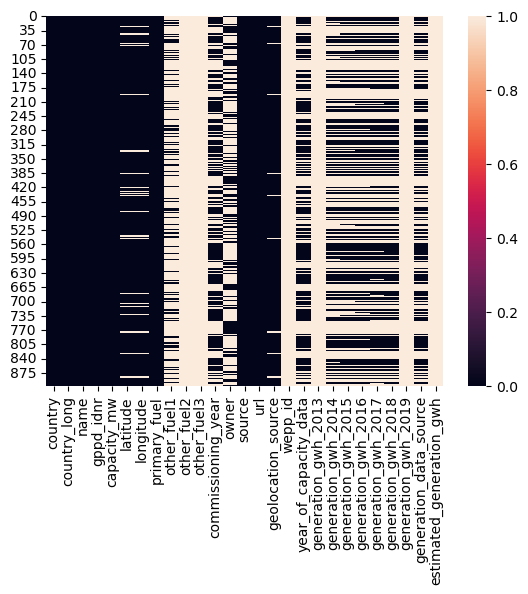

In [12]:
# Let's check the null values with heatmap
sns.heatmap(df.isnull())

as we see that there are many columns have null values, then firstly i have to replace the null values using mean, median or mode

In [13]:
import statistics as st

In [14]:
df.head(1)

country country_long              name   gppd_idnr  capacity_mw  latitude  \
0     IND        India  ACME Solar Tower  WRI1020239          2.5   28.1839   

   longitude primary_fuel other_fuel1 other_fuel2  ...  year_of_capacity_data  \
0    73.2407        Solar         NaN         NaN  ...                    NaN   

   generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                  NaN                 NaN                 NaN   

  generation_gwh_2016 generation_gwh_2017  generation_gwh_2018  \
0                 NaN                 NaN                  NaN   

   generation_gwh_2019  generation_data_source  estimated_generation_gwh  
0                  NaN                     NaN                       NaN  

[1 rows x 27 columns]

In [15]:
#df.drop([],axis=1,inplace=True)
df.drop(['country','country_long','name',
         'gppd_idnr','other_fuel1','other_fuel2','other_fuel3','owner',
         'url','wepp_id','generation_gwh_2013','generation_gwh_2014',
         'generation_gwh_2019','estimated_generation_gwh',
         'generation_data_source'],axis=1,inplace=True)

In [16]:
df.head(1)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   

   year_of_capacity_data  generation_gwh_2015  generation_gwh_2016  \
0                    NaN                  NaN                  NaN   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN

In [17]:
df.shape

(907, 12)

In [18]:
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

<Axes: >

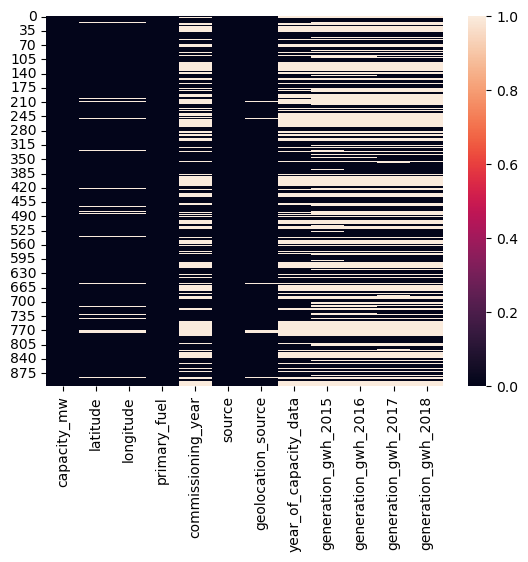

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.head(1)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   

   year_of_capacity_data  generation_gwh_2015  generation_gwh_2016  \
0                    NaN                  NaN                  NaN   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN

In [21]:
# Now Replace Null Values by Mean, Median, Or Mode

<Axes: >

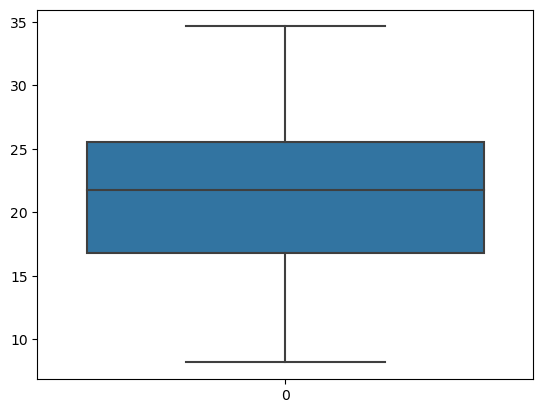

In [22]:
sns.boxplot(df['latitude'])

In [23]:
df['latitude'].mean()

21.1979181184669

In [24]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
# Fill na value by mean

<Axes: >

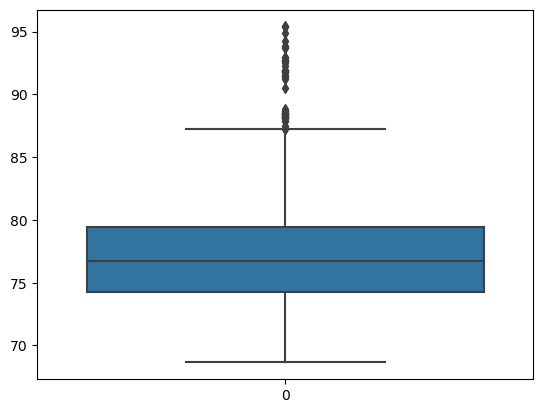

In [25]:
sns.boxplot(df['longitude'])

In [26]:
df['longitude'].median()
# fill na values by median because in this columns outliers are present 

76.7195

In [27]:
df['longitude'].fillna(df['longitude'].median(),inplace=True)

<Axes: >

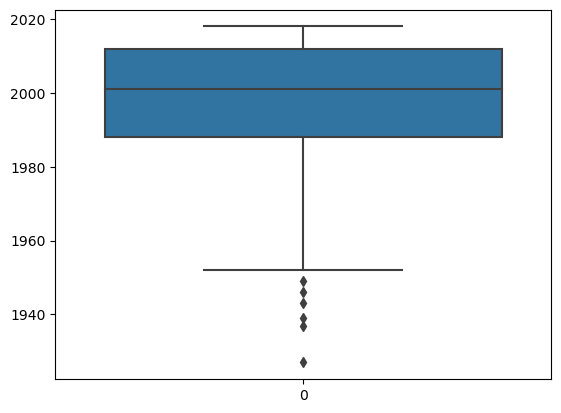

In [28]:
sns.boxplot(df['commissioning_year'])

In [29]:
df['commissioning_year'].median()

2001.0

In [30]:
df['commissioning_year'].fillna(df['commissioning_year'].median(),inplace=True)

In [31]:
df['geolocation_source'].mode()

0    WRI
Name: geolocation_source, dtype: object

In [32]:
df['geolocation_source'].fillna(df['geolocation_source'].mode(),inplace=True)

In [33]:
df['geolocation_source'].fillna('WRI',inplace=True)

In [34]:
df['year_of_capacity_data'].dtypes

dtype('float64')

<Axes: >

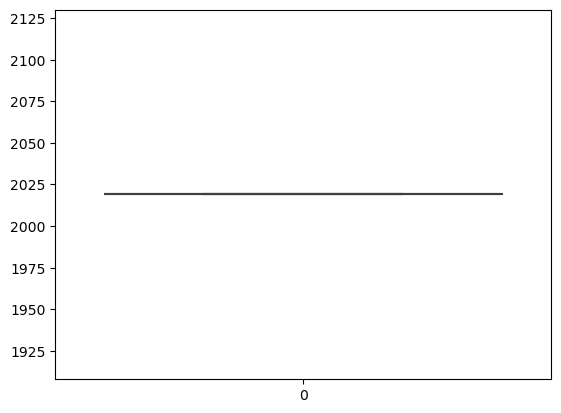

In [35]:
sns.boxplot(df['year_of_capacity_data'])

In [36]:
print(df['year_of_capacity_data'].mean())
print(df['year_of_capacity_data'].median())

2019.0
2019.0


In [37]:
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(),inplace=True)
# replace null values with mean because no any outliers are present 

<Axes: >

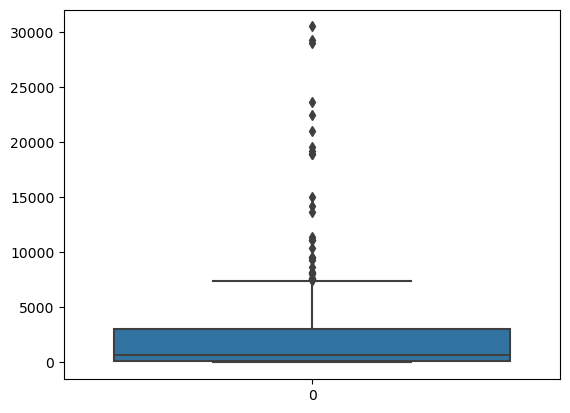

In [38]:
sns.boxplot(df['generation_gwh_2015'])

In [39]:
print(df['generation_gwh_2015'].mean())
print(df['generation_gwh_2015'].median())

2428.2269459614085
711.181225


In [40]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace=True)
# replace null values with median because outliers are present in this data set

<Axes: >

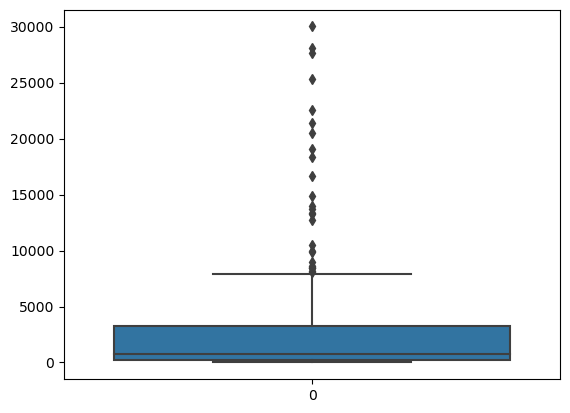

In [41]:
sns.boxplot(df['generation_gwh_2016'])

In [42]:
print(df['generation_gwh_2016'].mean())
print(df['generation_gwh_2016'].mean())

2467.9368586349096
2467.9368586349096


In [43]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace=True)
# replace null values with median because outliers are present in this data set

<Axes: >

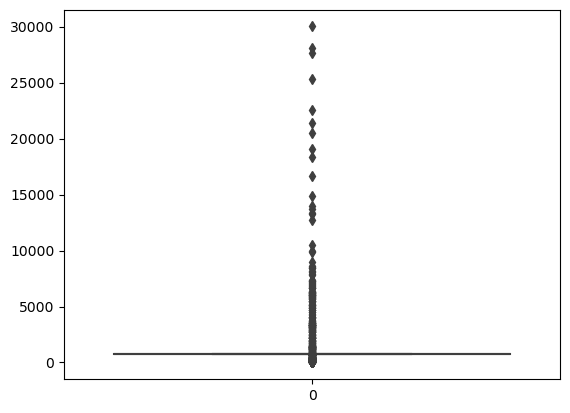

In [44]:
sns.boxplot(df['generation_gwh_2016'])

In [45]:
print(df['generation_gwh_2017'].mean())
print(df['generation_gwh_2017'].mean())

2547.7593045102053
2547.7593045102053


In [46]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(), inplace=True)
# replace null values with median because outliers are present in this data set

<Axes: >

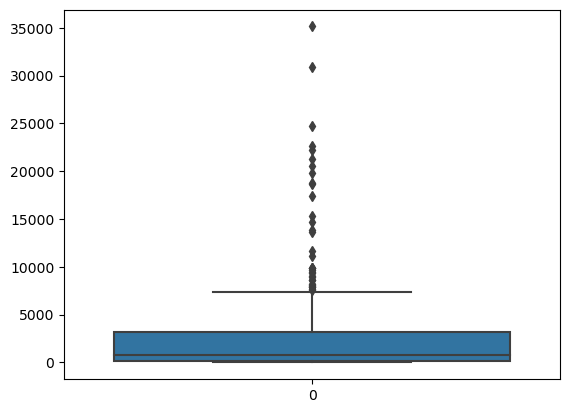

In [47]:
sns.boxplot(df['generation_gwh_2018'])

In [48]:
print(df['generation_gwh_2018'].mean())
print(df['generation_gwh_2018'].mean())

2600.804098662014
2600.804098662014


In [49]:
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median(), inplace=True)
# replace null values with median because outliers are present in this data set

<Axes: >

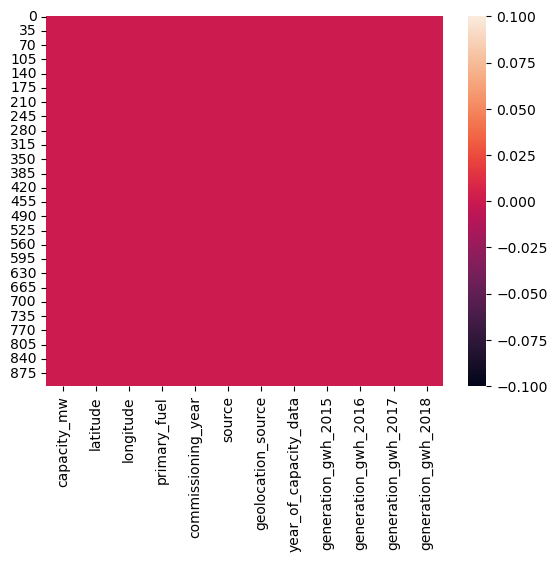

In [50]:
sns.heatmap(df.isnull())

In [51]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

Now No any Null Values are present in this data 

In [52]:
df.shape

(907, 12)

after remove the unwanted columns there are 13 columns are left

In [53]:
df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2001.0   
2         39.2   21.9038    69.3732         Wind              2001.0   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   year_of_capacity_data  generation_gwh_2015  generation_gwh_2016  \
0                 2019.0           711.181225           737.205450   
1                 2019.0           711.181225           737.205450   
2                 2019.0           711.181225           737.205450   
3                 2019.0           843.747000           886.004428   
4                 2019.0          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0           817.977250           751.644375  
1           817.977250           751.644375  
2           817.977250           751.644375  
3           663.774500           626.239128  
4          5385.579736          7279.000000

In [54]:
df.tail()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2001.0   
904         25.5   15.2758    75.5811         Wind              2001.0   
905         80.0   24.3500    73.7477         Coal              2001.0   
906         16.5    9.9344    77.4768         Wind              2001.0   

                                  source geolocation_source  \
902        Central Electricity Authority                WRI   
903  Karnataka Power Corporation Limited     Industry About   
904                                  CDM                WRI   
905                   Hindustan Zinc ltd                WRI   
906                                  CDM                WRI   

     year_of_capacity_data  generation_gwh_2015  generation_gwh_2016  \
902                 2019.0             0.994875            233.59665   
903                 2019.0           711.181225            737.20545   
904                 2019.0           711.181225            737.20545   
905                 2019.0           711.181225            737.20545   
906                 2019.0           711.181225            737.20545   

     generation_gwh_2017  generation_gwh_2018  
902            865.40000           686.500000  
903            817.97725           751.644375  
904            817.97725           751.644375  
905            817.97725           751.644375  
906            817.97725           751.644375

In [55]:
df.iloc[488:500,:]

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
488        207.0   31.9553    75.8360        Hydro              1987.0   
489         15.0   20.0805    79.7148         Coal              2001.0   
490         31.2   19.0160    72.8948          Gas              2001.0   
491         25.2   18.5309    72.9465          Oil              2001.0   
492         75.0   18.9988    72.8997          Gas              2001.0   
493       4620.0   22.8230    69.5532         Coal              2010.0   
494       4000.0   22.8158    69.5281         Coal              2012.0   
495         28.3   15.2666    76.3288        Hydro              1963.0   
496         11.2   15.8555    75.1002      Biomass              2001.0   
497         15.0   19.2610    73.3638         Coal              2001.0   
498        610.0   26.1953    85.3017         Coal              2005.0   
499        126.0   25.2354    92.2279        Hydro              2012.0   

                            source geolocation_source  year_of_capacity_data  \
488  Central Electricity Authority                WRI                 2019.0   
489               Greta Energy ltd                WRI                 2019.0   
490                Bharat Corp ltd                WRI                 2019.0   
491                  Jsw Steel ltd                WRI                 2019.0   
492                  Ongc Gas corp                WRI                 2019.0   
493  Central Electricity Authority                WRI                 2019.0   
494  Central Electricity Authority                WRI                 2019.0   
495  Central Electricity Authority                WRI                 2019.0   
496               Shree Sugars ltd                WRI                 2019.0   
497  Technocraft Technocraft group                WRI                 2019.0   
498  Central Electricity Authority                WRI                 2019.0   
499  Central Electricity Authority                WRI                 2019.0   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
488          1163.612700          1078.092450           1264.40620   
489           711.181225           737.205450            817.97725   
490           711.181225           737.205450            817.97725   
491           711.181225           737.205450            817.97725   
492           711.181225           737.205450            817.97725   
493         30539.000000         28078.000000          20311.00000   
494         23679.000000         25303.000000          24599.00000   
495            61.520850            31.332550             51.12310   
496           711.181225           737.205450            817.97725   
497           711.181225           737.205450            817.97725   
498           669.939000           669.546018           1610.56120   
499           442.128250           389.691750            499.95765   

     generation_gwh_2018  
488          1237.909350  
489           751.644375  
490           751.644375  
491           751.644375  
492           751.644375  
493         22178.000000  
494         24752.000000  
495            88.972900  
496           751.644375  
497           751.644375  
498          2707.839000  
499           361.135250

In [56]:
df['geolocation_source'].value_counts()

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64

In [57]:
df.iloc[488,:]

capacity_mw                                      207.0
latitude                                       31.9553
longitude                                       75.836
primary_fuel                                     Hydro
commissioning_year                              1987.0
source                   Central Electricity Authority
geolocation_source                                 WRI
year_of_capacity_data                           2019.0
generation_gwh_2015                          1163.6127
generation_gwh_2016                         1078.09245
generation_gwh_2017                          1264.4062
generation_gwh_2018                         1237.90935
Name: 488, dtype: object

In [58]:
# seprating Numericaal and categorical columns

# checking for categorical columns 
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
        
print("Categorical Columns:", categorical_col)
print('\n')


# Checking for Numeircal columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
        
print('Numerical Columns:',numerical_col)

Categorical Columns: ['primary_fuel', 'source', 'geolocation_source']


Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [59]:
# Checking numberof unique values in each column
df.nunique().to_frame('No. of unique values')

No. of unique values
capacity_mw                             361
latitude                                837
longitude                               827
primary_fuel                              8
commissioning_year                       73
source                                  191
geolocation_source                        3
year_of_capacity_data                     1
generation_gwh_2015                     397
generation_gwh_2016                     404
generation_gwh_2017                     409
generation_gwh_2018                     411

Here one of column (year_of_capacity_data) have only one data (2019), so it's not important column for prediction 

so i will remove this columns

In [60]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [61]:
df.nunique().to_frame('No. of unique values')

No. of unique values
capacity_mw                           361
latitude                              837
longitude                             827
primary_fuel                            8
commissioning_year                     73
source                                191
geolocation_source                      3
generation_gwh_2015                   397
generation_gwh_2016                   404
generation_gwh_2017                   409
generation_gwh_2018                   411

In [62]:
df.shape

(907, 11)

In [63]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.427103         1998.728776   
std     590.085456    6.079148    4.815073           13.158621   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.281800   76.719500         2001.000000   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1510.071296          1565.361383          1657.121797   
std            2984.994556          3005.087210          3046.862910   
min               0.000000             0.000000             0.000000   
25%             711.181225           737.205450           817.977250   
50%             711.181225           737.205450           817.977250   
75%             711.181225           737.205450           817.977250   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  
count           907.000000  
mean           1665.011030  
std            3168.826750  
min               0.000000  
25%             751.644375  
50%             751.644375  
75%             751.644375  
max           35136.000000

Observation
This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/incvalid values

From the above description we can observe the following:

The Counts of all the columns are same which means there are no missing values in the dataset.

the mean value is greater then median(50%) in some columns which means the data is skewed to right in these column.

The data is the some column have mean values less then median which means the data is skewed to left.

By summarizing the data we can observe in some columns there are a huge difference between 75% and max hence there are outliers present int he data.

We can also notice the Standard deviation, min, 25% percentile valuese from this describe method.

# Data Visualization
Univariate Analysis

capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64


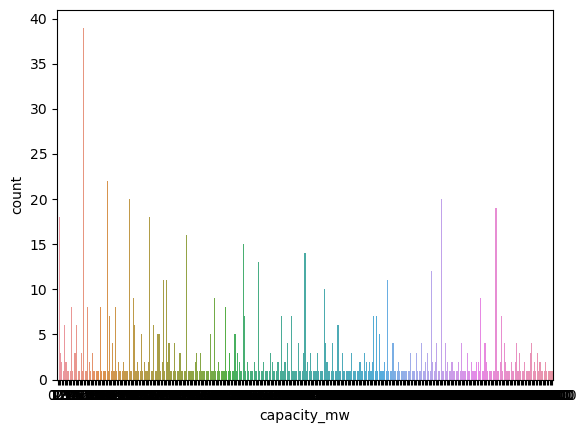

In [64]:
# Visulize the number of capacity_mw
ax=sns.countplot(x='capacity_mw',data=df)
print(df['capacity_mw'].value_counts())

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64


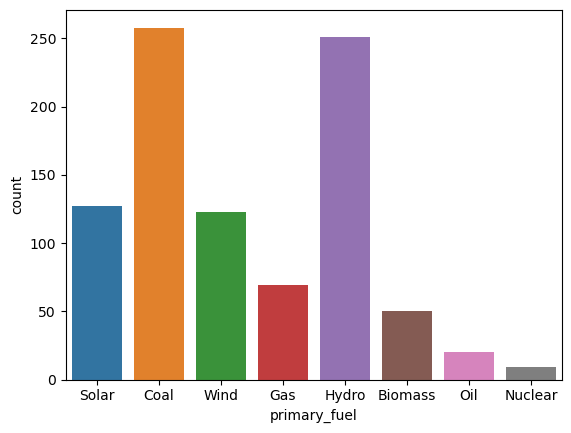

In [65]:
# Visulize the number of primary_fuel
ax=sns.countplot(x='primary_fuel',data=df)
print(df['primary_fuel'].value_counts())

The Higest number of primary_fuel is Coal and lowest is Nuclear

latitude
21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: count, Length: 837, dtype: int64


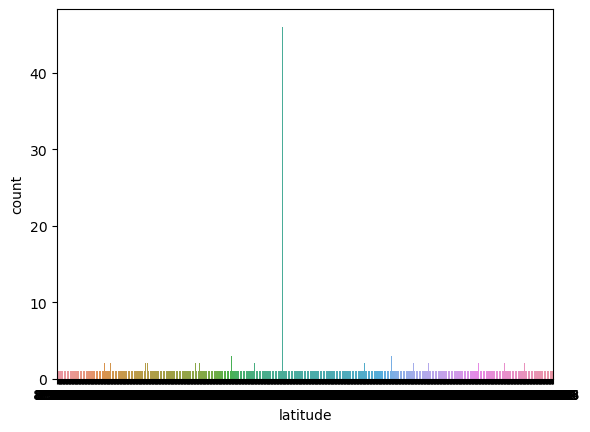

In [66]:
ax=sns.countplot(x='latitude',data=df)
print(df['latitude'].value_counts())

longitude
76.7195    47
71.6917     4
75.8988     3
72.8983     3
71.6918     3
           ..
74.2393     1
77.0435     1
73.8254     1
74.3916     1
77.4768     1
Name: count, Length: 827, dtype: int64


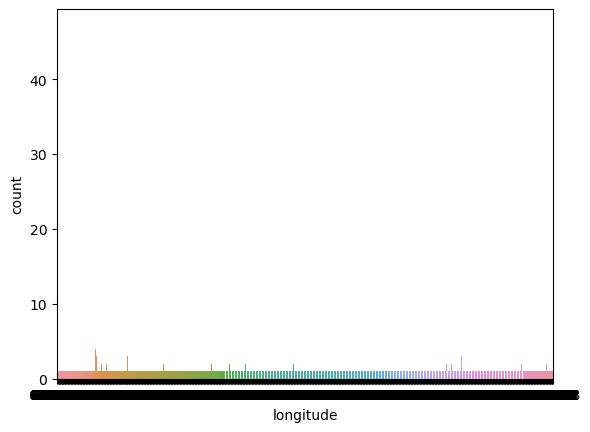

In [67]:
ax=sns.countplot(x='longitude',data=df)
print(df['longitude'].value_counts())

commissioning_year
2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: count, Length: 73, dtype: int64


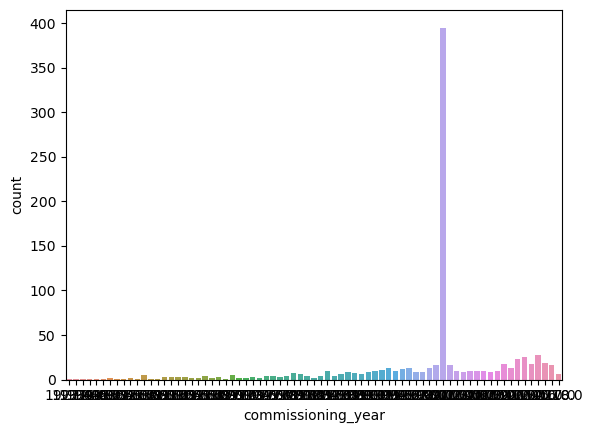

In [68]:
ax=sns.countplot(x='commissioning_year',data=df)
print(df['commissioning_year'].value_counts())

source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: count, Length: 191, dtype: int64


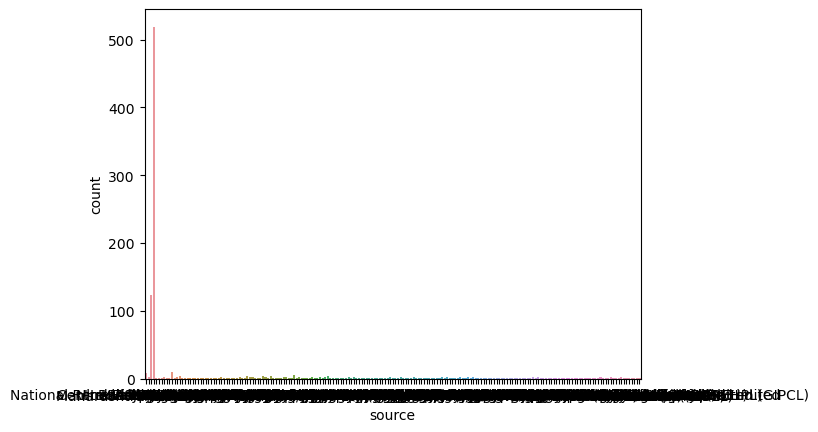

In [69]:
ax=sns.countplot(x='source',data=df)
print(df['source'].value_counts())

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64


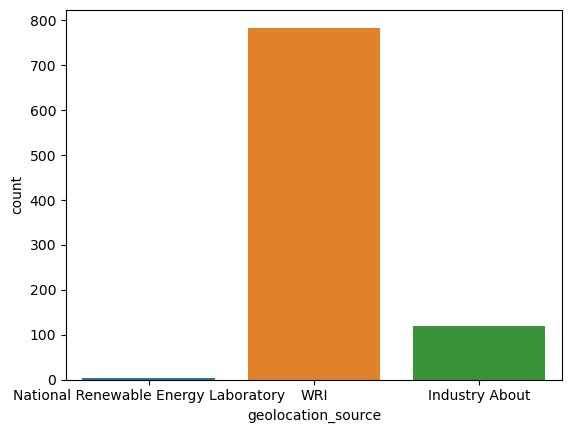

In [70]:
ax=sns.countplot(x='geolocation_source',data=df)
print(df['geolocation_source'].value_counts())

generation_gwh_2015
711.181225      485
0.000000         27
1497.798000       1
10422.690000      1
240.799900        1
               ... 
14192.000000      1
219.377600        1
288.460450        1
410.566850        1
0.994875          1
Name: count, Length: 397, dtype: int64


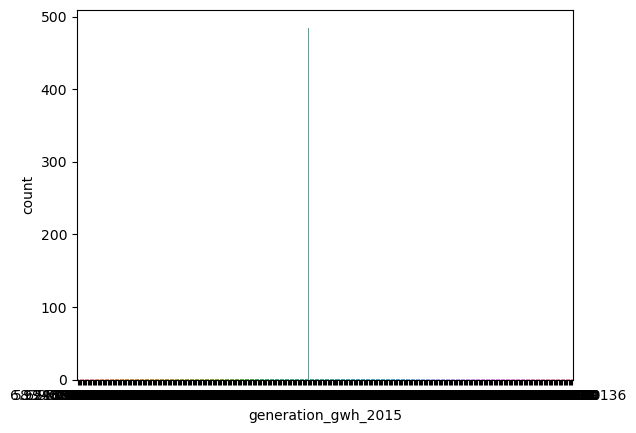

In [71]:
ax=sns.countplot(x='generation_gwh_2015',data=df)
print(df['generation_gwh_2015'].value_counts())

generation_gwh_2016
737.205450      473
0.000000         30
8470.570000       2
1511.000000       2
12.676300         1
               ... 
131.021600        1
6130.019928       1
5931.490000       1
14834.800000      1
233.596650        1
Name: count, Length: 404, dtype: int64


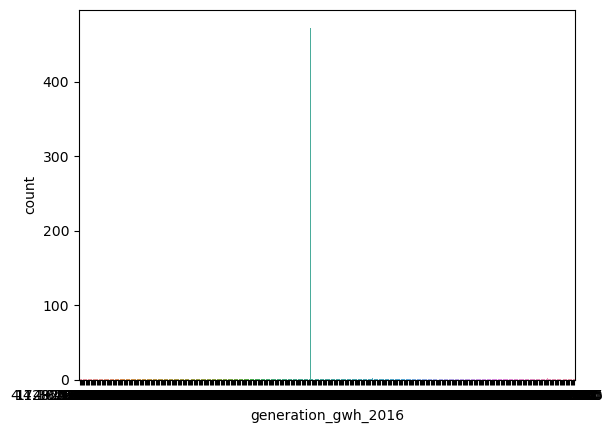

In [72]:
ax=sns.countplot(x='generation_gwh_2016',data=df)
print(df['generation_gwh_2016'].value_counts())

generation_gwh_2017
817.97725      467
0.00000         32
170.08530        2
272.73945        1
0.97510          1
              ... 
15177.00000      1
191.94545        1
307.37540        1
382.43820        1
865.40000        1
Name: count, Length: 409, dtype: int64


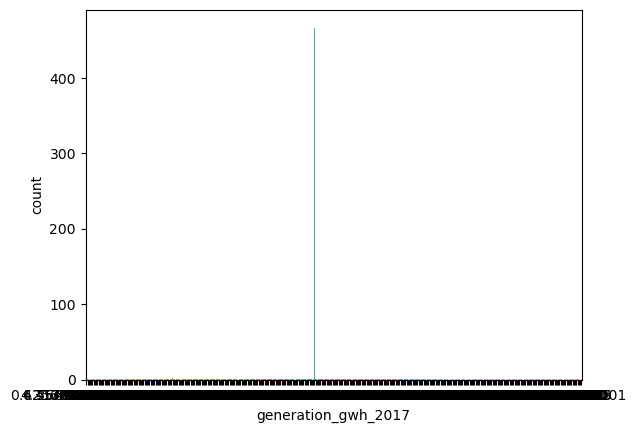

In [73]:
ax=sns.countplot(x='generation_gwh_2017',data=df)
print(df['generation_gwh_2017'].value_counts())

generation_gwh_2018
751.644375      459
0.000000         39
21.939750         1
17.213500         1
7200.400000       1
               ... 
7321.267900       1
6532.350000       1
15305.220000      1
373.970750        1
686.500000        1
Name: count, Length: 411, dtype: int64


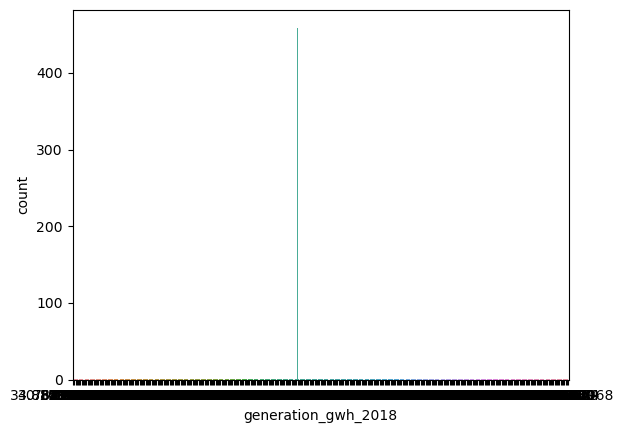

In [74]:
ax=sns.countplot(x='generation_gwh_2018',data=df)
print(df['generation_gwh_2018'].value_counts())

# Bivariate Analysis

<Axes: title={'center': 'Comparison between capaciaty_mw and primary_fuel'}, xlabel='capacity_mw', ylabel='primary_fuel'>

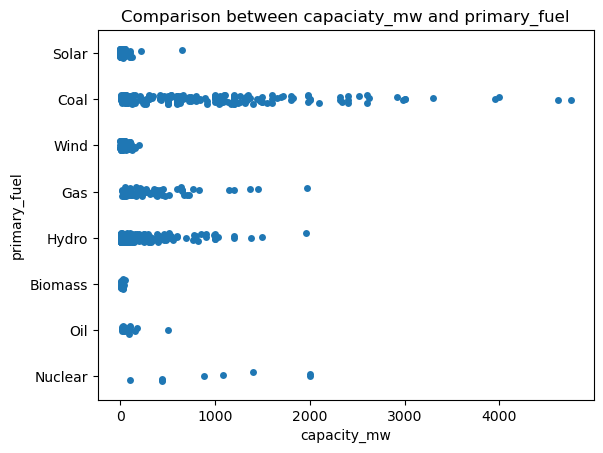

In [75]:
# check the relation between capacity_mw and primary_fuel
plt.title('Comparison between capaciaty_mw and primary_fuel')
sns.stripplot(x='capacity_mw',y='primary_fuel',data=df)

by this graph we can clearly see that Coal is the maximum number with more then 4000 megha wat capacity and Biomass is very less megha wat capacity

<Axes: title={'center': 'Comparison between capaciaty_mw and latitude'}, xlabel='capacity_mw', ylabel='latitude'>

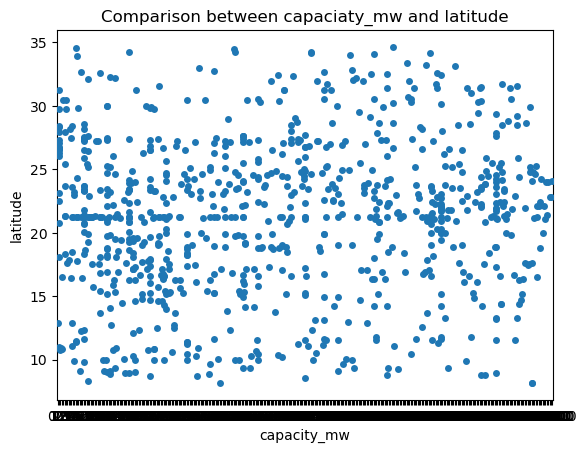

In [76]:
# check the relation between capacity_mw and latitude
plt.title('Comparison between capaciaty_mw and latitude')
sns.stripplot(x='capacity_mw',y='latitude',data=df)

<Axes: title={'center': 'Comparison between capaciaty_mw and longitude'}, xlabel='capacity_mw', ylabel='longitude'>

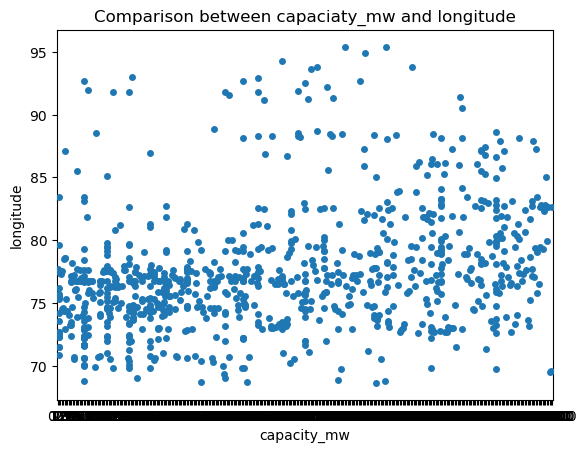

In [77]:
# check the relation between capacity_mw and longitude
plt.title('Comparison between capaciaty_mw and longitude')
sns.stripplot(x='capacity_mw',y='longitude',data=df)

<Axes: title={'center': 'Comparison between capaciaty_mw and source'}, xlabel='capacity_mw', ylabel='source'>

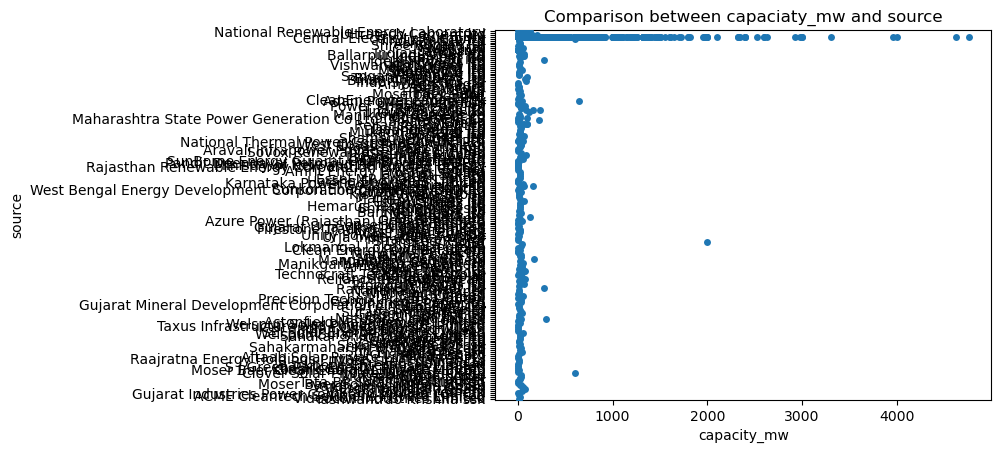

In [78]:
# check the relation between capacity_mw and source
plt.title('Comparison between capaciaty_mw and source')
sns.stripplot(x='capacity_mw',y='source',data=df)

<Axes: title={'center': 'Comparison between capaciaty_mw and geolocation_source'}, xlabel='capacity_mw', ylabel='geolocation_source'>

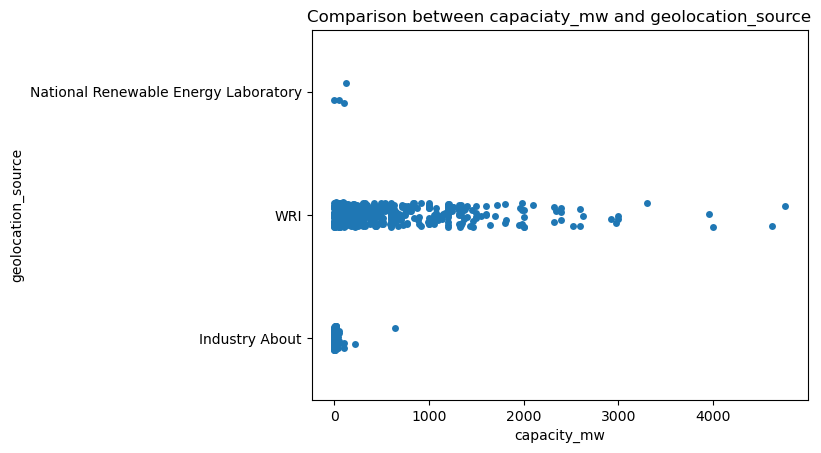

In [79]:
# check the relation between capacity_mw and geolocation_source
plt.title('Comparison between capaciaty_mw and geolocation_source')
sns.stripplot(x='capacity_mw',y='geolocation_source',data=df)

<Axes: title={'center': 'Comparison between capaciaty_mw and generation_gwh_2015'}, xlabel='capacity_mw', ylabel='generation_gwh_2015'>

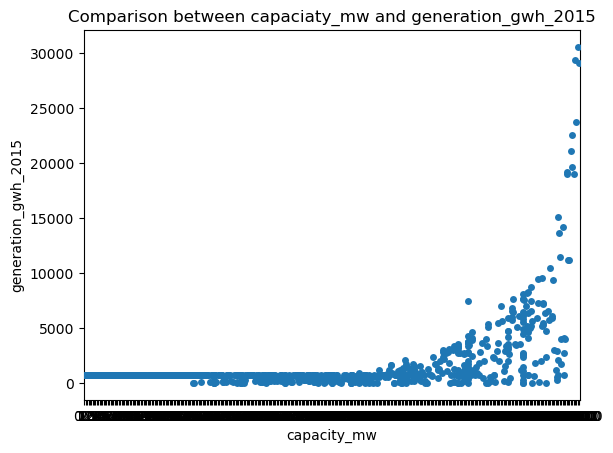

In [80]:
# check the relation between capacity_mw and generation_gwh_2015
plt.title('Comparison between capaciaty_mw and generation_gwh_2015')
sns.stripplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<Axes: title={'center': 'Comparison between capaciaty_mw and generation_gwh_2016'}, xlabel='capacity_mw', ylabel='generation_gwh_2016'>

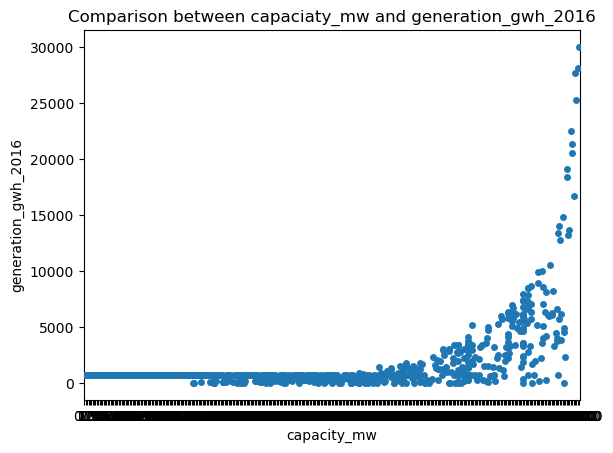

In [81]:
# check the relation between capacity_mw and generation_gwh_2016
plt.title('Comparison between capaciaty_mw and generation_gwh_2016')
sns.stripplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<Axes: title={'center': 'Comparison between capaciaty_mw and generation_gwh_2017'}, xlabel='capacity_mw', ylabel='generation_gwh_2017'>

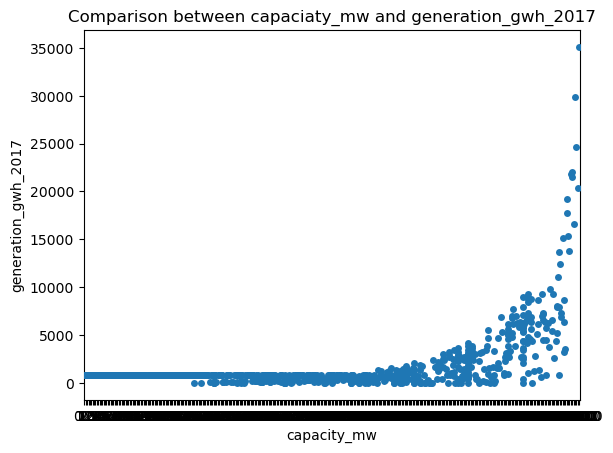

In [82]:
# check the relation between capacity_mw and generation_gwh_2017
plt.title('Comparison between capaciaty_mw and generation_gwh_2017')
sns.stripplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<Axes: title={'center': 'Comparison between capaciaty_mw and generation_gwh_2018'}, xlabel='capacity_mw', ylabel='generation_gwh_2018'>

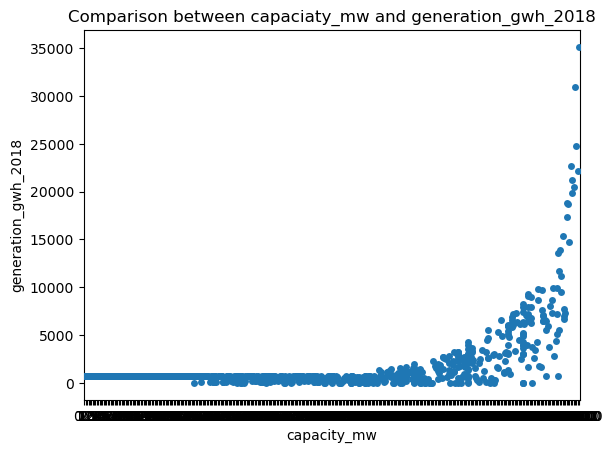

In [83]:
# check the relation between capacity_mw and generation_gwh_2018
plt.title('Comparison between capaciaty_mw and generation_gwh_2018')
sns.stripplot(x='capacity_mw',y='generation_gwh_2018',data=df)

In [84]:
df.head(1)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225            737.20545            817.97725   

   generation_gwh_2018  
0           751.644375

# Multivariate Analysis

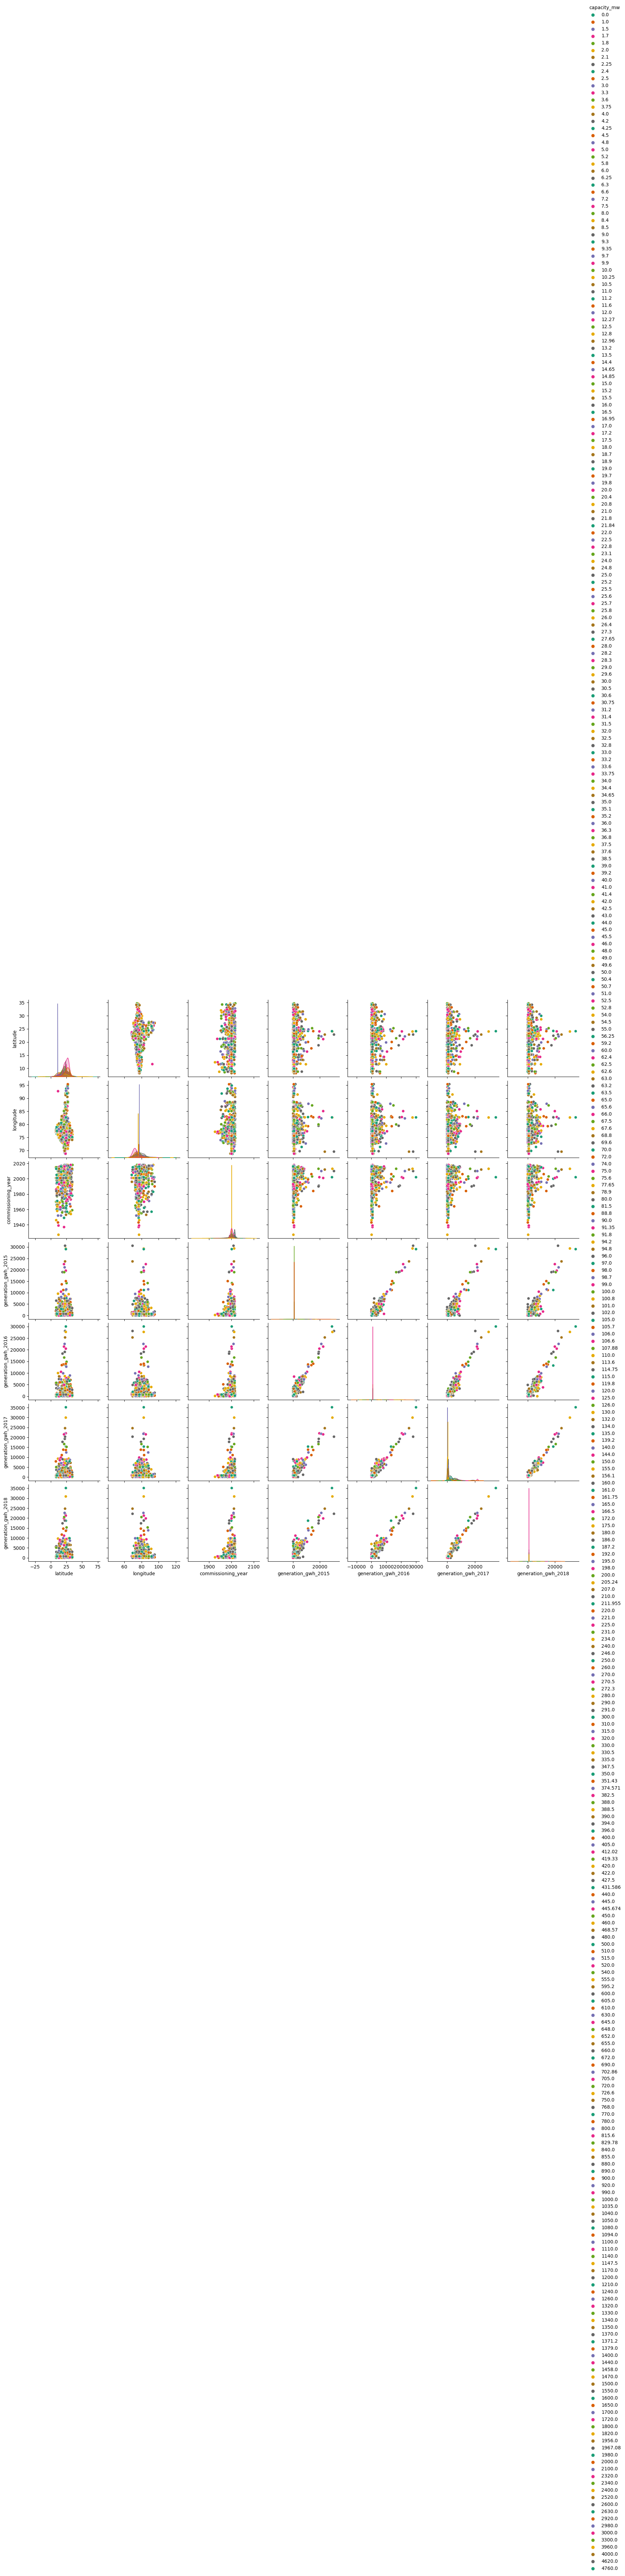

In [85]:
sns.pairplot(df,hue='capacity_mw', palette='Dark2')
plt.show()

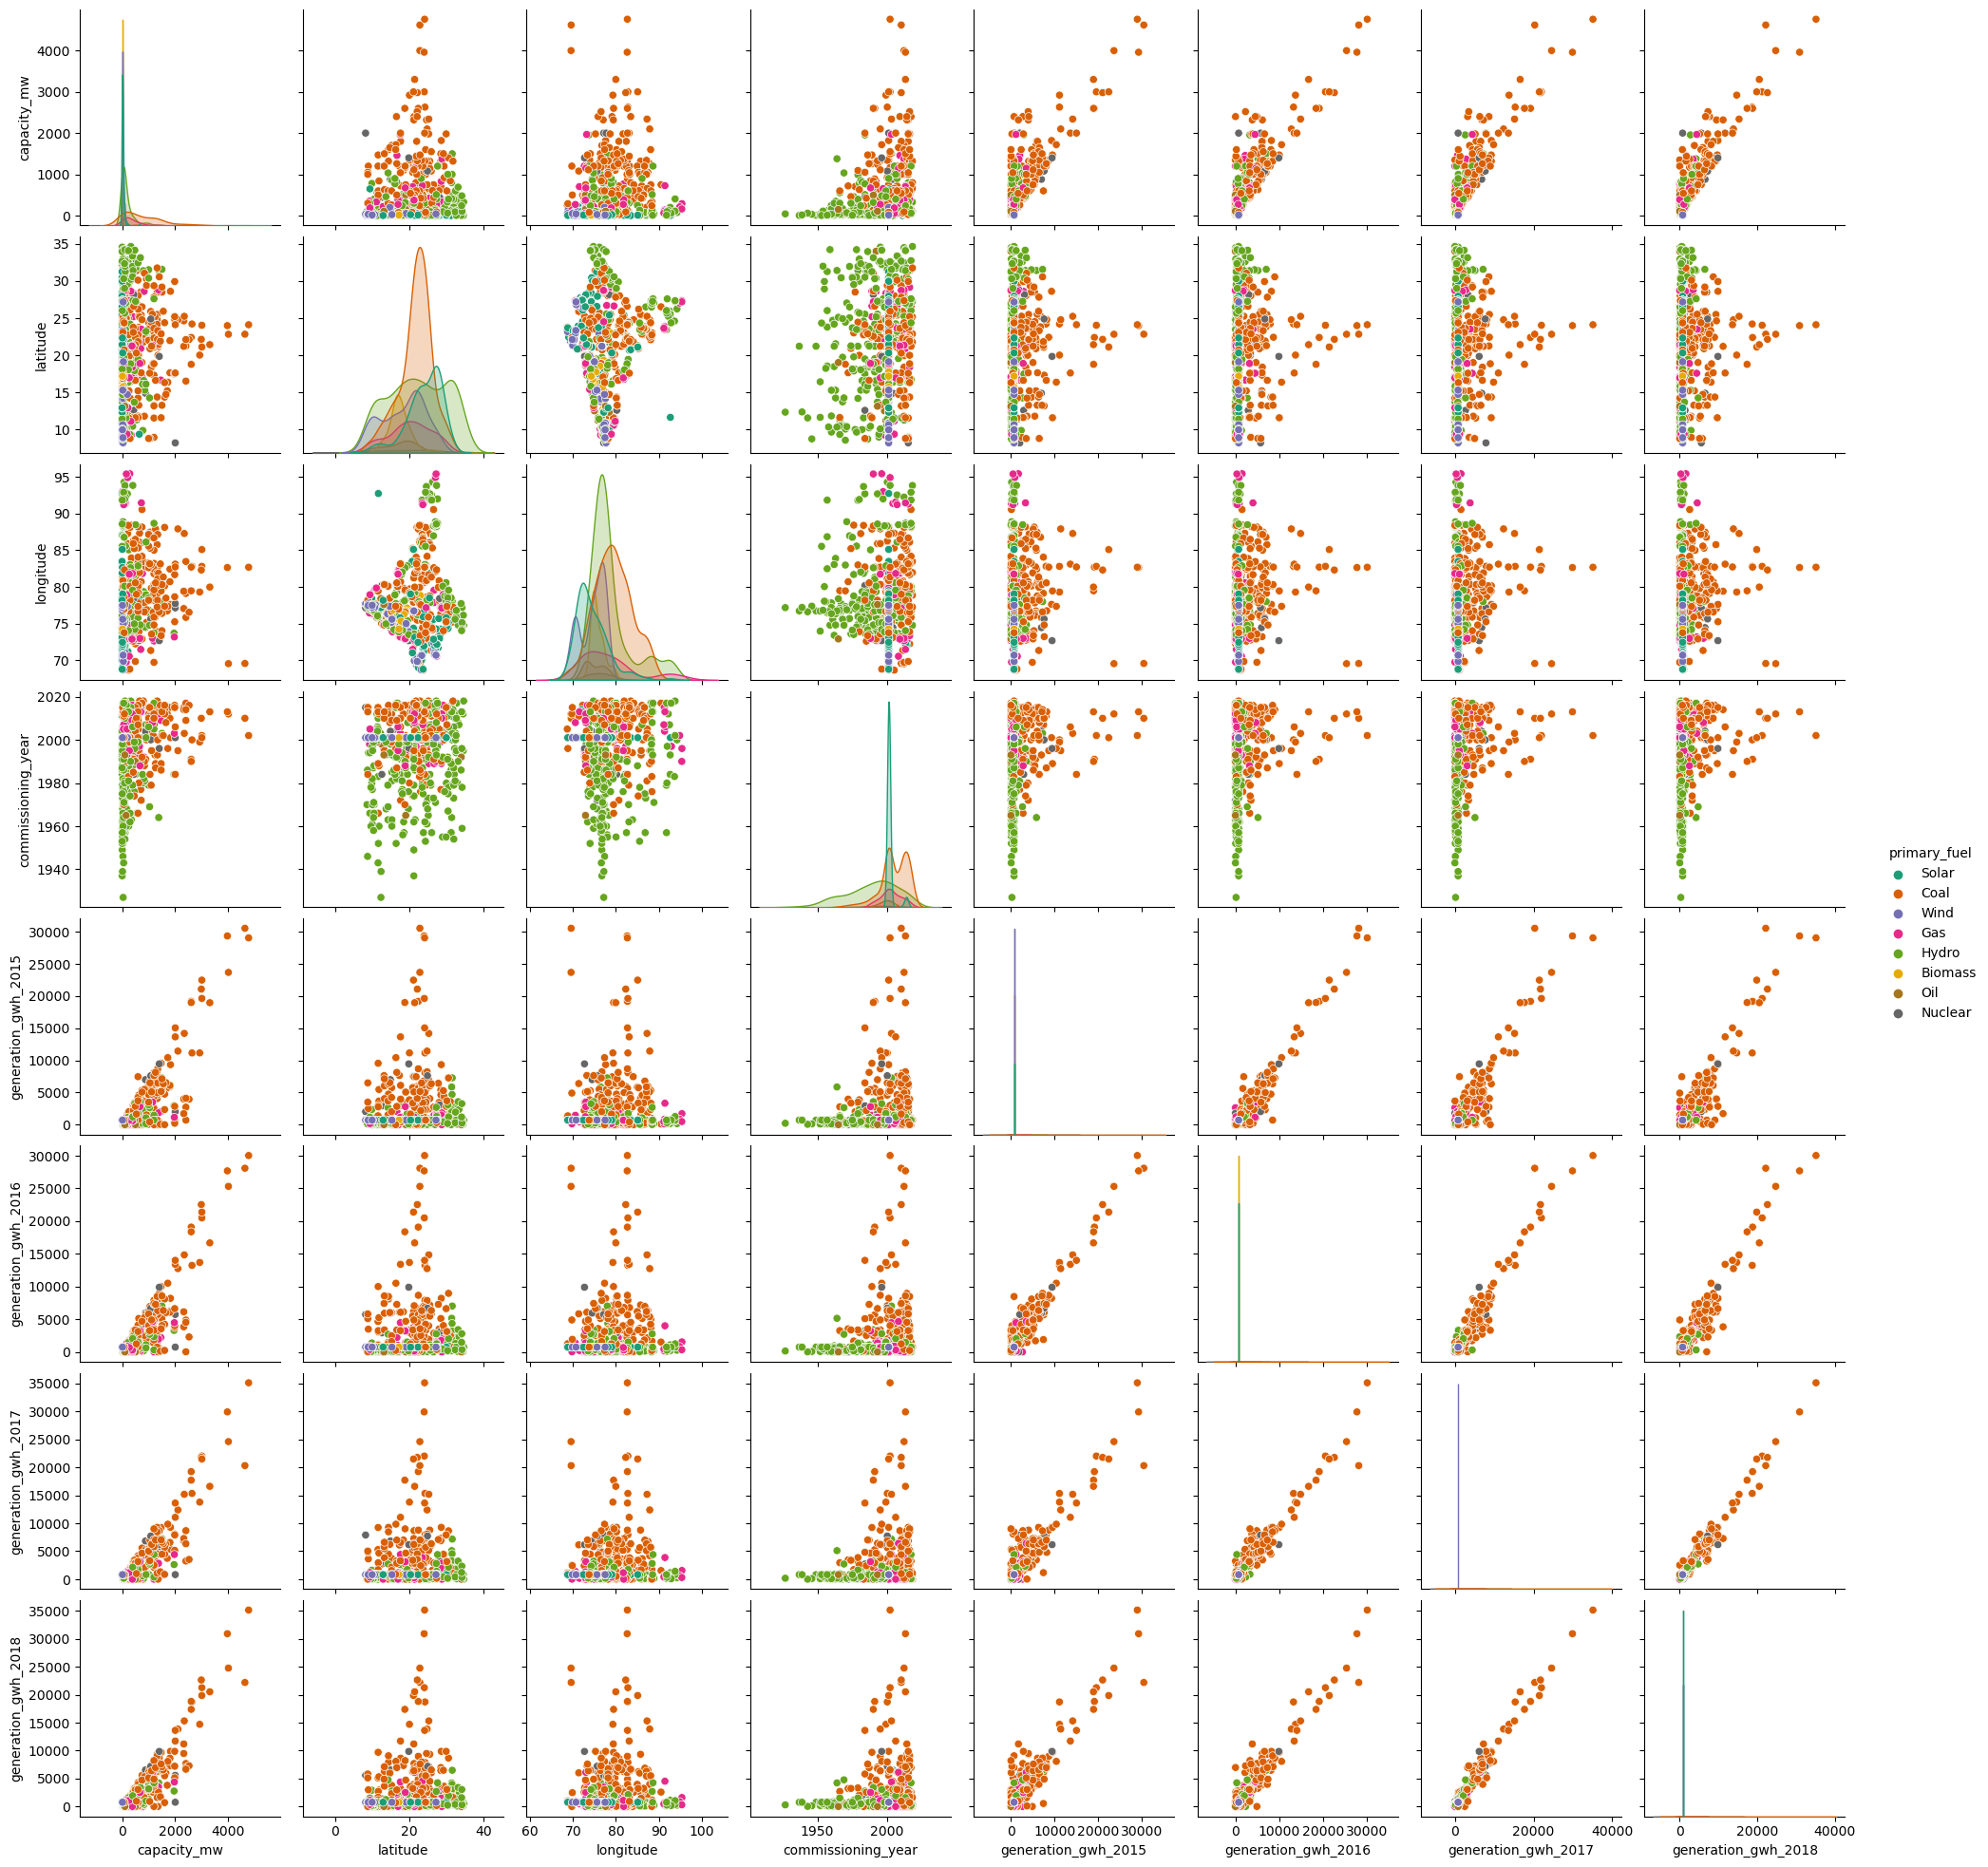

In [86]:
sns.pairplot(df,hue='primary_fuel', palette='Dark2')
plt.show()

The pairplot gives the pairwise relation between the feartures on the basis of the target 'primary_fuel', on dignorl we can notice the distribution plot

# Checking for Outliers

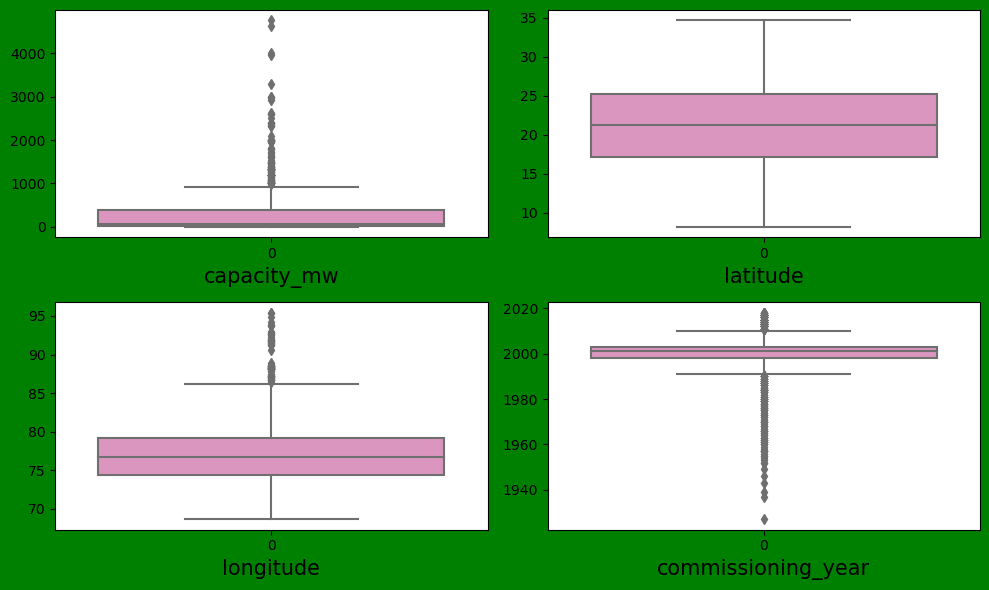

In [87]:
# Lets check the outliers by plotting boxplot.
plt.figure(figsize=(10,6), facecolor='green')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

By the box plot we can see that in capacity_mw, longitude and commissioning_year have outliers are present so we need to remove the outliers

# Remove The Outliers

In [88]:
df.head(1)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225            737.20545            817.97725   

   generation_gwh_2018  
0           751.644375

In [89]:
# Remove the outliers by Zscore
from scipy.stats import zscore
out_features=df[['capacity_mw','longitude','commissioning_year','generation_gwh_2015',
                 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z=np.abs(zscore(out_features))
z

capacity_mw  longitude  commissioning_year  generation_gwh_2015  \
0       0.548908   0.869917            0.933076             0.267783   
1       0.386977   0.585590            0.172699             0.267783   
2       0.486679   1.673567            0.172699             0.267783   
3       0.324240   2.895239            0.400812             0.223348   
4       2.498942   1.035238            1.237227             1.476964   
..           ...        ...                 ...                  ...   
902     2.159821   0.014609            1.313265             0.505833   
903     0.548060   0.153415            0.172699             0.267783   
904     0.509909   0.383592            0.172699             0.267783   
905     0.417498   0.764564            0.172699             0.267783   
906     0.525169   0.010327            0.172699             0.267783   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0               0.275737             0.275565             0.288394  
1               0.275737             0.275565             0.288394  
2               0.275737             0.275565             0.288394  
3               0.226194             0.326203             0.327990  
4               1.557432             1.224379             1.772608  
..                   ...                  ...                  ...  
902             0.443415             0.259992             0.308963  
903             0.275737             0.275565             0.288394  
904             0.275737             0.275565             0.288394  
905             0.275737             0.275565             0.288394  
906             0.275737             0.275565             0.288394  

[907 rows x 7 columns]

In [90]:
# thereshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 179, 183,
        209, 209, 209, 209, 209, 219, 222, 244, 308, 308, 308, 308, 308,
        323, 333, 340, 342, 360, 363, 364, 364, 364, 364, 364, 371, 375,
        416, 427, 444, 454, 478, 482, 482, 484, 493, 493, 493, 493, 493,
        494, 494, 494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583,
        592, 601, 621, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 724,
        724, 724, 724, 726, 726, 726, 726, 726, 728, 767, 786, 786, 786,
        786, 786, 788, 807, 808, 808, 808, 808, 808, 818, 847, 848, 880,
        880, 880, 880, 880], dtype=int64),
 array([0, 3, 4, 5, 6, 0, 3, 4, 5, 6, 0, 1, 1, 0, 3, 4, 5, 6, 2, 2, 1, 0,
        3, 4, 5, 6, 1, 1, 1, 2, 1, 0, 0, 3, 4, 5, 6, 2, 0, 1, 1, 2, 2, 2,
        0, 6, 2, 0, 3, 4, 5, 6, 0, 3, 4, 5, 6, 1, 1, 2, 2, 1, 2, 1, 2, 2,
        2, 2, 1, 0, 3, 4, 5, 6, 0, 3, 4, 5, 6, 0, 3, 4, 5, 6, 2, 2, 3, 4,
    

In [91]:
z.iloc[723,3]

0.5057998790199467

In [92]:
# Now removing the data above  Zscore and creating ne DF
df1=df[(z<3).all(axis=1)]

In [93]:
df1

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal              2001.0   
2           39.2   21.9038    69.3732         Wind              2001.0   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2001.0   
904         25.5   15.2758    75.5811         Wind              2001.0   
905         80.0   24.3500    73.7477         Coal              2001.0   
906         16.5    9.9344    77.4768         Wind              2001.0   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2015  \
0    National Renewable Energy Laboratory           711.181225   
1                                     WRI           711.181225   
2                                     WRI           711.181225   
3                                     WRI           843.747000   
4                                     WRI          5916.370000   
..                                    ...                  ...   
902                                   WRI             0.994875   
903                        Industry About           711.181225   
904                                   WRI           711.181225   
905                                   WRI           711.181225   
906                                   WRI           711.181225   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             737.205450           817.977250           751.644375  
1             737.205450           817.977250           751.644375  
2             737.205450           817.977250           751.644375  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903           737.205450           817.977250           751.644375  
904           737.205450           817.977250           751.644375  
905           737.205450           817.977250           751.644375  
906           737.205450           817.977250           751.644375  

[849 rows x 11 columns]

In [94]:
print(df.shape)
print(df1.shape)

(907, 11)
(849, 11)


In [95]:
# shape of old and New DataFrame
print("Old Data Frame- ", df.shape[0])
print("New Data Frame- ", df1.shape[0])

Old Data Frame-  907
New Data Frame-  849


In [96]:
# Checking Percentage how many % of data are removed
print('Data Loss Precentage-',((df.shape[0]-df1.shape[0])/df.shape[0])*100 )

Data Loss Precentage- 6.39470782800441


In [97]:
df=df1

In [98]:
df.shape

(849, 11)

# Checking for Skewness

In [99]:
df.skew

<bound method DataFrame.skew of      capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal              2001.0   
2           39.2   21.9038    69.3732         Wind              2001.0   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2001.0   
904         25.5   15.2758    75.5811         Wind              2001.0   
905         80.0   24.3500    73.7477         Coal              2001.0   
906         16.5    9.9344    77.4768         Wind              2001.0   

                                   source  \
0    National Renewable Energy Lab

# Encoding categorical columns

In [100]:
import sklearn

In [101]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407           6.0              2011.0   
1           98.0   24.7663    74.6090           1.0              2001.0   
2           39.2   21.9038    69.3732           7.0              2001.0   
3          135.0   23.8712    91.3602           2.0              2004.0   
4         1800.0   21.9603    82.4091           1.0              2015.0   
..           ...       ...        ...           ...                 ...   
902       1600.0   16.2949    77.3568           1.0              2016.0   
903          3.0   12.8932    78.1654           6.0              2001.0   
904         25.5   15.2758    75.5811           7.0              2001.0   
905         80.0   24.3500    73.7477           1.0              2001.0   
906         16.5    9.9344    77.4768           7.0              2001.0   

     source  geolocation_source  generation_gwh_2015  generation_gwh_2016  \
0     109.0                 1.0           711.181225           737.205450   
1     174.0                 2.0           711.181225           737.205450   
2      21.0                 2.0           711.181225           737.205450   
3      22.0                 2.0           843.747000           886.004428   
4      22.0                 2.0          5916.370000          6243.000000   
..      ...                 ...                  ...                  ...   
902    22.0                 2.0             0.994875           233.596650   
903    77.0                 0.0           711.181225           737.205450   
904    21.0                 2.0           711.181225           737.205450   
905    59.0                 2.0           711.181225           737.205450   
906    21.0                 2.0           711.181225           737.205450   

     generation_gwh_2017  generation_gwh_2018  
0             817.977250           751.644375  
1             817.977250           751.644375  
2             817.977250           751.644375  
3             663.774500           626.239128  
4            5385.579736          7279.000000  
..                   ...                  ...  
902           865.400000           686.500000  
903           817.977250           751.644375  
904           817.977250           751.644375  
905           817.977250           751.644375  
906           817.977250           751.644375  

[849 rows x 11 columns]

# Checking How the Data has been distriubted in each column

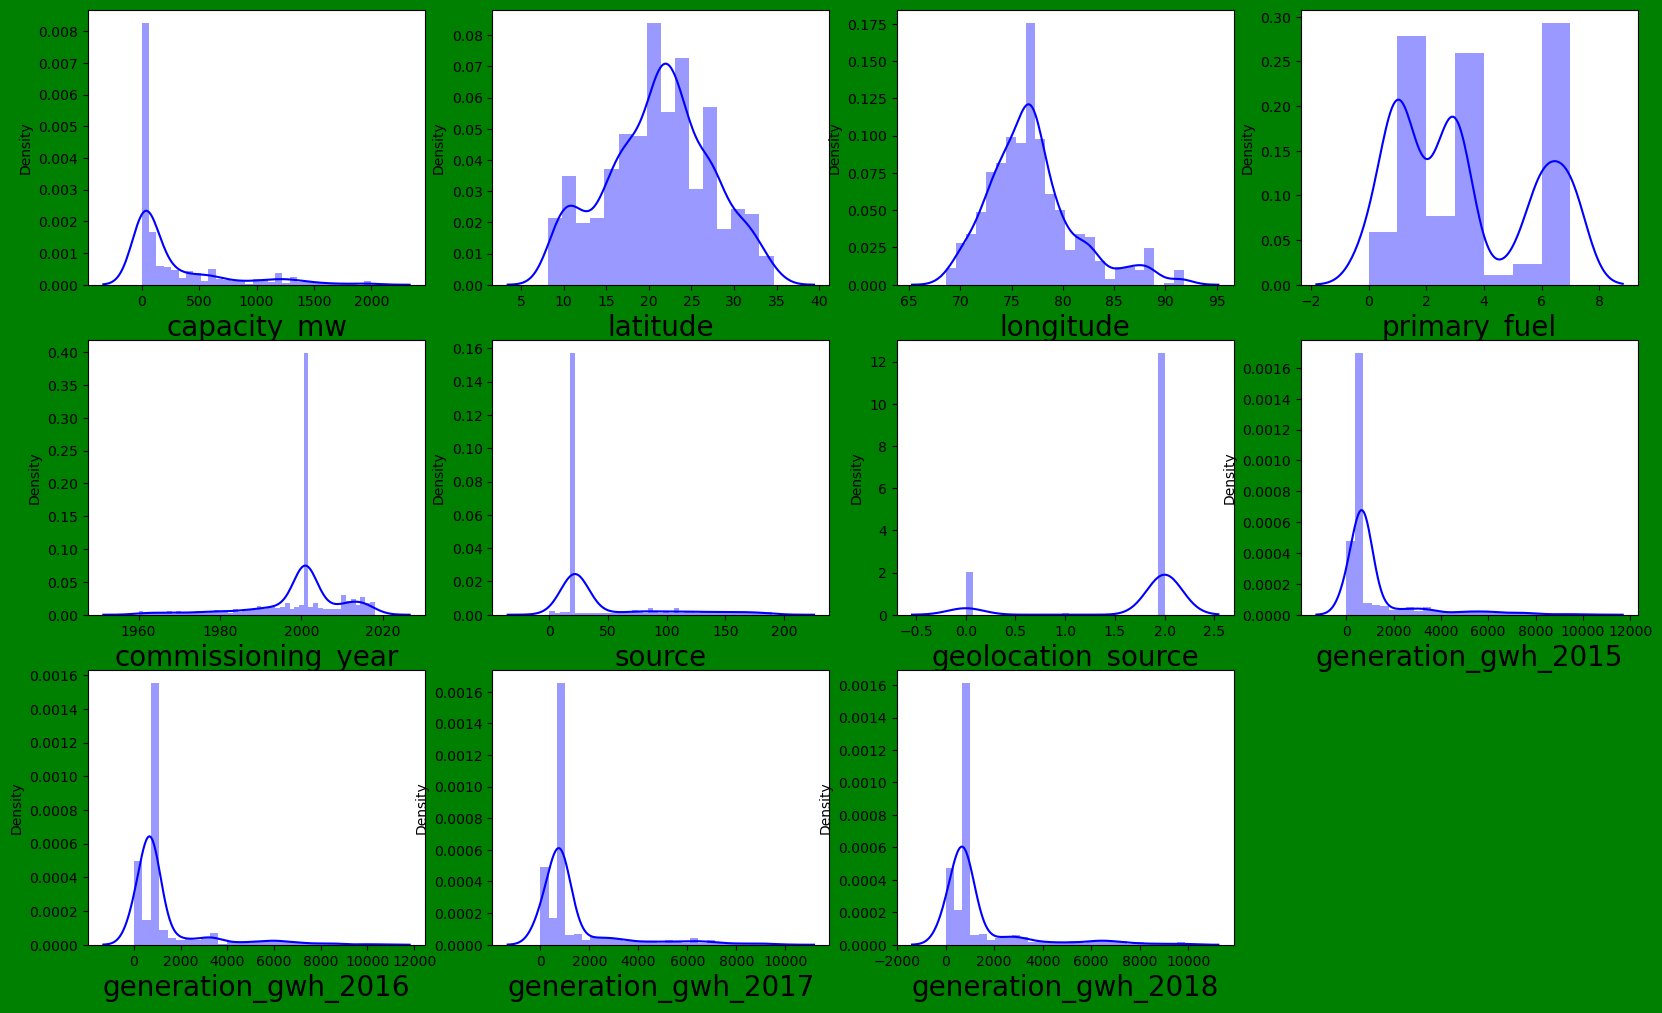

In [102]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distribution plots we can notice that the data almost looks normal.

In [103]:
df.describe()

capacity_mw    latitude   longitude  primary_fuel  commissioning_year  \
count   849.000000  849.000000  849.000000    849.000000          849.000000   
mean    270.805643   21.097799   77.014546      3.273263         1999.684335   
std     426.912402    6.099440    4.301300      2.325668           11.099645   
min       0.000000    8.168900   68.644700      0.000000         1960.000000   
25%      16.500000   16.924800   74.256200      1.000000         1999.000000   
50%      50.400000   21.197918   76.719500      3.000000         2001.000000   
75%     330.000000   25.129600   78.923500      6.000000         2003.000000   
max    2000.000000   34.649000   91.823900      7.000000         2018.000000   

           source  geolocation_source  generation_gwh_2015  \
count  849.000000          849.000000           849.000000   
mean    45.236749            1.717314          1204.977007   
std     45.717800            0.693769          1617.519577   
min      0.000000            0.000000             0.000000   
25%     22.000000            2.000000           711.181225   
50%     22.000000            2.000000           711.181225   
75%     43.000000            2.000000           711.181225   
max    190.000000            2.000000         10422.690000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           849.000000           849.000000           849.000000  
mean           1256.103726          1337.714278          1319.168143  
std            1671.856326          1711.805147          1770.756315  
min               0.000000             0.000000             0.000000  
25%             737.205450           817.977250           751.644375  
50%             737.205450           817.977250           751.644375  
75%             737.205450           817.977250           751.644375  
max           10503.882000          9833.690000          9861.136000

# Correlation between target variable and independent variables.

In [104]:
# Checking the correlation between features and the target.
cor=df.corr()
cor

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.049204   0.265048     -0.402195   
latitude                0.049204  1.000000  -0.015571     -0.001078   
longitude               0.265048 -0.015571   1.000000     -0.382963   
primary_fuel           -0.402195 -0.001078  -0.382963      1.000000   
commissioning_year      0.212998  0.099423   0.077797     -0.065909   
source                 -0.281383  0.070073  -0.235608      0.037444   
geolocation_source      0.239775 -0.203563   0.263742     -0.478295   
generation_gwh_2015     0.711563  0.058387   0.148952     -0.275740   
generation_gwh_2016     0.779613  0.043317   0.188615     -0.286276   
generation_gwh_2017     0.797254  0.061500   0.190784     -0.286461   
generation_gwh_2018     0.807878  0.057750   0.203594     -0.294432   

                     commissioning_year    source  geolocation_source  \
capacity_mw                    0.212998 -0.281383            0.239775   
latitude                       0.099423  0.070073           -0.203563   
longitude                      0.077797 -0.235608            0.263742   
primary_fuel                  -0.065909  0.037444           -0.478295   
commissioning_year             1.000000  0.080332           -0.055552   
source                         0.080332  1.000000           -0.497655   
geolocation_source            -0.055552 -0.497655            1.000000   
generation_gwh_2015            0.108637 -0.155346            0.124537   
generation_gwh_2016            0.175945 -0.157937            0.126615   
generation_gwh_2017            0.194023 -0.154501            0.123860   
generation_gwh_2018            0.189260 -0.163090            0.130745   

                     generation_gwh_2015  generation_gwh_2016  \
capacity_mw                     0.711563             0.779613   
latitude                        0.058387             0.043317   
longitude                       0.148952             0.188615   
primary_fuel                   -0.275740            -0.286276   
commissioning_year              0.108637             0.175945   
source                         -0.155346            -0.157937   
geolocation_source              0.124537             0.126615   
generation_gwh_2015             1.000000             0.917149   
generation_gwh_2016             0.917149             1.000000   
generation_gwh_2017             0.849573             0.940888   
generation_gwh_2018             0.844531             0.930595   

                     generation_gwh_2017  generation_gwh_2018  
capacity_mw                     0.797254             0.807878  
latitude                        0.061500             0.057750  
longitude                       0.190784             0.203594  
primary_fuel                   -0.286461            -0.294432  
commissioning_year              0.194023             0.189260  
source                         -0.154501            -0.163090  
geolocation_source              0.123860             0.130745  
generation_gwh_2015             0.849573             0.844531  
generation_gwh_2016             0.940888             0.930595  
generation_gwh_2017             1.000000             0.970289  
generation_gwh_2018             0.970289             1.000000

This gives the correlation between the dependent and independent variables. we can visualize this by plotting heatmap.

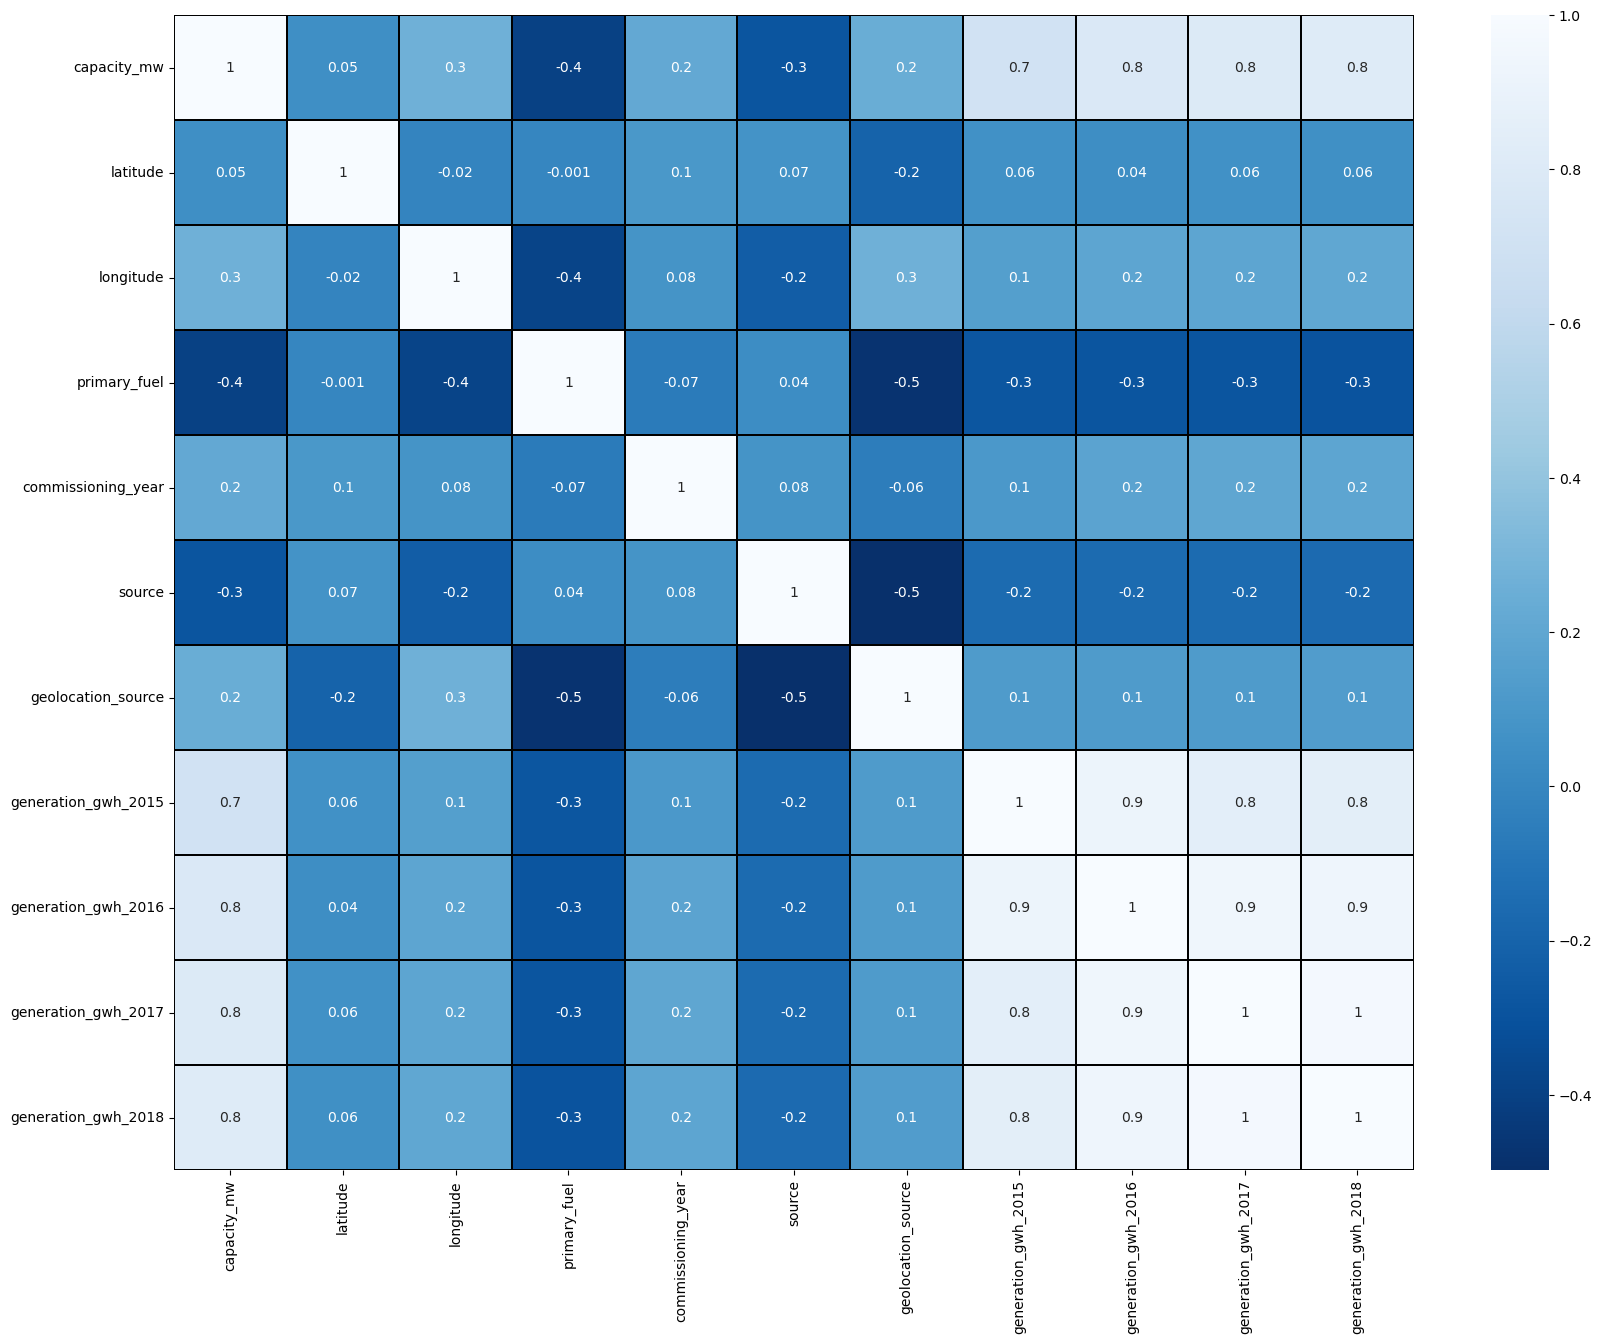

In [105]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',cmap='Blues_r',annot=True)
plt.yticks(rotation=0);
plt.show()

This heatmap show the correlation matrix by visulaizing the data. we can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation

by this heatmap we can see the almost data have positive corelated

In [106]:
df.head(1)

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0          2.5   28.1839    73.2407           6.0              2011.0   109.0   

   geolocation_source  generation_gwh_2015  generation_gwh_2016  \
0                 1.0           711.181225            737.20545   

   generation_gwh_2017  generation_gwh_2018  
0            817.97725           751.644375

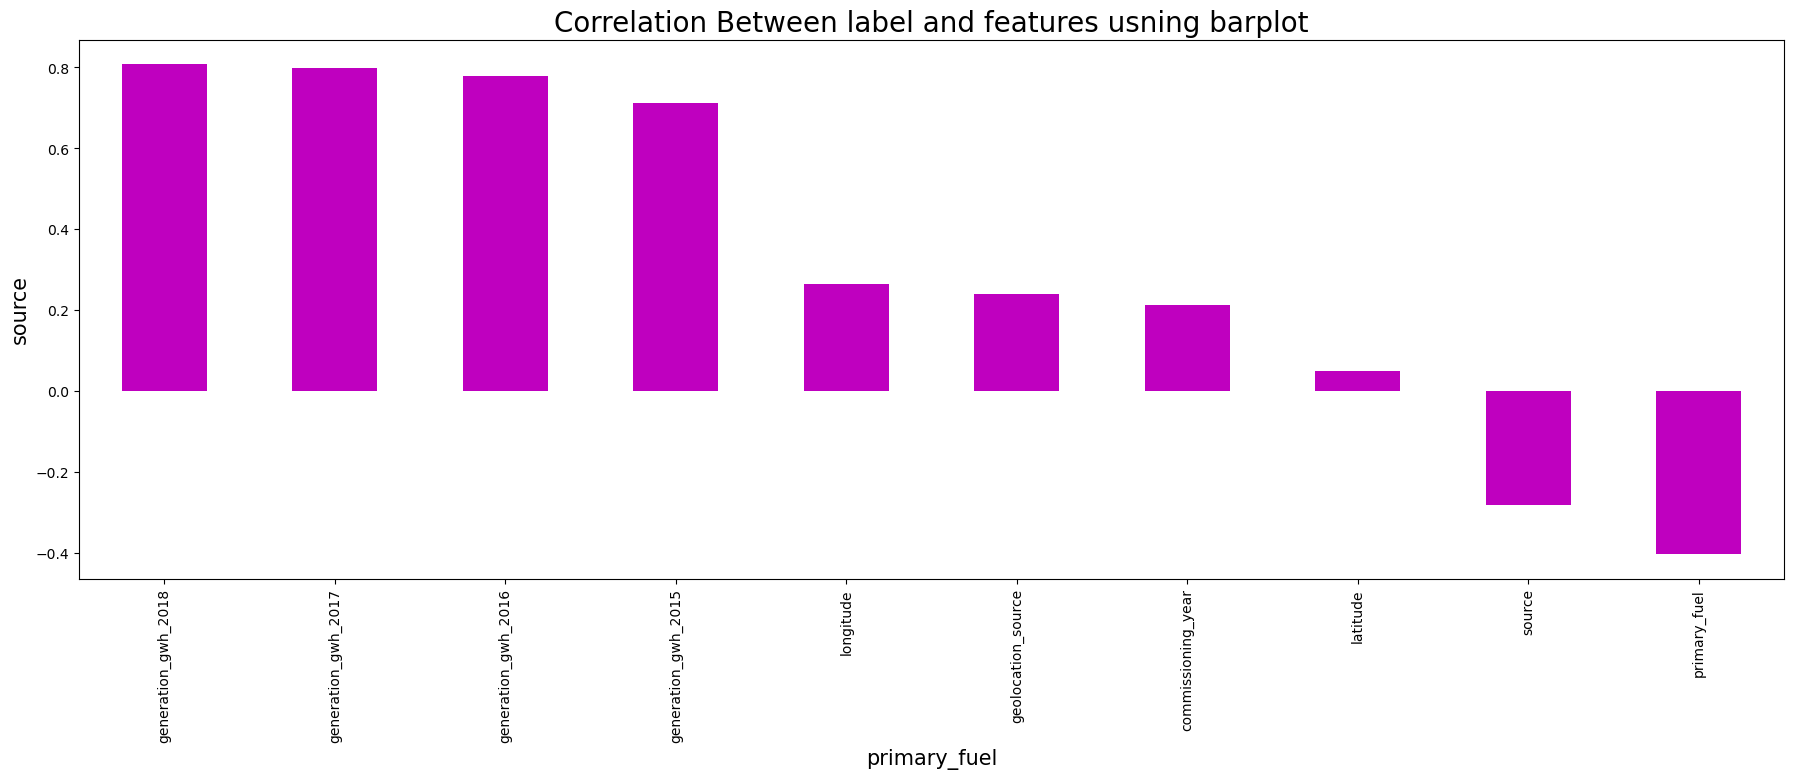

In [107]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='m')
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('source', fontsize=15)
plt.title('Correlation Between label and features usning barplot',fontsize=20)
plt.show()

In [108]:
df.head(1)

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0          2.5   28.1839    73.2407           6.0              2011.0   109.0   

   geolocation_source  generation_gwh_2015  generation_gwh_2016  \
0                 1.0           711.181225            737.20545   

   generation_gwh_2017  generation_gwh_2018  
0            817.97725           751.644375

# Separating Features and lable

# Firstly work on to find primary_fuel

In [109]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']

In [110]:
x.head()

capacity_mw  latitude  longitude  commissioning_year  source  \
0          2.5   28.1839    73.2407              2011.0   109.0   
1         98.0   24.7663    74.6090              2001.0   174.0   
2         39.2   21.9038    69.3732              2001.0    21.0   
3        135.0   23.8712    91.3602              2004.0    22.0   
4       1800.0   21.9603    82.4091              2015.0    22.0   

   geolocation_source  generation_gwh_2015  generation_gwh_2016  \
0                 1.0           711.181225           737.205450   
1                 2.0           711.181225           737.205450   
2                 2.0           711.181225           737.205450   
3                 2.0           843.747000           886.004428   
4                 2.0          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0           817.977250           751.644375  
1           817.977250           751.644375  
2           817.977250           751.644375  
3           663.774500           626.239128  
4          5385.579736          7279.000000

In [111]:
y.head()

0    6.0
1    1.0
2    7.0
3    2.0
4    1.0
Name: primary_fuel, dtype: float64

# Feature Scaling using Standard Scalarization

In [112]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

capacity_mw  latitude  longitude  commissioning_year    source  \
0      -0.628850  1.162447  -0.877891            1.020063  1.395536   
1      -0.405019  0.601803  -0.559590            0.118602  2.818140   
2      -0.542833  0.132221  -1.777567            0.118602 -0.530451   
3      -0.318299  0.454966   3.337156            0.389040 -0.508564   
4       3.584098  0.141490   1.254908            1.380647 -0.508564   
..           ...       ...        ...                 ...       ...   
844     3.115341 -0.787897   0.079617            1.470793 -0.508564   
845    -0.627678 -1.345933   0.267717            0.118602  0.695177   
846    -0.574943 -0.955076  -0.333455            0.118602 -0.530451   
847    -0.447207  0.533511  -0.759950            0.118602  0.301225   
848    -0.596037 -1.831312   0.107532            0.118602 -0.530451   

     geolocation_source  generation_gwh_2015  generation_gwh_2016  \
0             -1.034548            -0.305460            -0.310555   
1              0.407704            -0.305460            -0.310555   
2              0.407704            -0.305460            -0.310555   
3              0.407704            -0.223455            -0.221501   
4              0.407704             2.914444             2.984608   
..                  ...                  ...                  ...   
844            0.407704            -0.744777            -0.611960   
845           -2.476800            -0.305460            -0.310555   
846            0.407704            -0.305460            -0.310555   
847            0.407704            -0.305460            -0.310555   
848            0.407704            -0.305460            -0.310555   

     generation_gwh_2017  generation_gwh_2018  
0              -0.303798            -0.320687  
1              -0.303798            -0.320687  
2              -0.303798            -0.320687  
3              -0.393933            -0.391549  
4               2.366070             3.367682  
..                   ...                  ...  
844            -0.276079            -0.357498  
845            -0.303798            -0.320687  
846            -0.303798            -0.320687  
847            -0.303798            -0.320687  
848            -0.303798            -0.320687  

[849 rows x 10 columns]

We have scaled the data using Standard Scalarization method.

# Checking Variance Inflation Factor(VIF)

In [113]:
# Finding Varience inflaction factor in each scaled column i.e, x.shape[1][1/(1-r2)]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values             Features
0    3.302881          capacity_mw
1    1.067474             latitude
2    1.146397            longitude
3    1.102907   commissioning_year
4    1.418283               source
5    1.451526   geolocation_source
6    6.527830  generation_gwh_2015
7   16.018911  generation_gwh_2016
8   21.207273  generation_gwh_2017
9   18.793464  generation_gwh_2018

By checking VIF values we can find the features causing multicollineraity problem. 

In [114]:
x.head()

capacity_mw  latitude  longitude  commissioning_year    source  \
0    -0.628850  1.162447  -0.877891            1.020063  1.395536   
1    -0.405019  0.601803  -0.559590            0.118602  2.818140   
2    -0.542833  0.132221  -1.777567            0.118602 -0.530451   
3    -0.318299  0.454966   3.337156            0.389040 -0.508564   
4     3.584098  0.141490   1.254908            1.380647 -0.508564   

   geolocation_source  generation_gwh_2015  generation_gwh_2016  \
0           -1.034548            -0.305460            -0.310555   
1            0.407704            -0.305460            -0.310555   
2            0.407704            -0.305460            -0.310555   
3            0.407704            -0.223455            -0.221501   
4            0.407704             2.914444             2.984608   

   generation_gwh_2017  generation_gwh_2018  
0            -0.303798            -0.320687  
1            -0.303798            -0.320687  
2            -0.303798            -0.320687  
3            -0.393933            -0.391549  
4             2.366070             3.367682

In [115]:
y.head()

0    6.0
1    1.0
2    7.0
3    2.0
4    1.0
Name: primary_fuel, dtype: float64

In [116]:
# Oversmpling the data
# !pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [117]:
y.value_counts()

primary_fuel
1.0    236
3.0    220
6.0    126
7.0    123
2.0     65
0.0     50
5.0     20
4.0      9
Name: count, dtype: int64

# Modelling
# Finding the Best

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    print("Best accurancy is ",maxAccu,"at random_state",maxRS)

Best accurancy is  0.8431372549019608 at random_state 1
Best accurancy is  0.8509803921568627 at random_state 2
Best accurancy is  0.8509803921568627 at random_state 2
Best accurancy is  0.8509803921568627 at random_state 2
Best accurancy is  0.8666666666666667 at random_state 5
Best accurancy is  0.8666666666666667 at random_state 5
Best accurancy is  0.8666666666666667 at random_state 5
Best accurancy is  0.8666666666666667 at random_state 5
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_state 9
Best accurancy is  0.8784313725490196 at random_

# Creating train test split

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [120]:
# Import multiple livrary 
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# Random Forest Classifier

In [121]:
# Checking accuracy for RandomForestClasifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9019607843137255
[[10  3  0  0  0  0  0  0]
 [ 1 71  2  3  0  1  0  0]
 [ 1  3  9  2  0  1  0  0]
 [ 0  3  0 63  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80        13
         1.0       0.85      0.91      0.88        78
         2.0       0.75      0.56      0.64        16
         3.0       0.93      0.95      0.94        66
         4.0       0.00      0.00      0.00         3
         5.0       0.60      0.60      0.60         5
         6.0       1.00      1.00      1.00        38
         7.0       1.00      1.00      1.00        36

    accuracy                           0.90       255
   macro avg       0.74      0.72      0.73       255
weighted avg       0.89      0.90      0.89       255



# Logistic Regression

In [122]:
# Checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7294117647058823
[[ 6  4  0  0  0  0  0  3]
 [ 0 63  1  9  0  0  0  5]
 [ 3  4  0  8  0  0  0  1]
 [ 0  8  0 46  0  0  0 12]
 [ 0  3  0  0  0  0  0  0]
 [ 2  0  1  2  0  0  0  0]
 [ 0  1  0  0  0  0 37  0]
 [ 0  0  0  2  0  0  0 34]]
              precision    recall  f1-score   support

         0.0       0.55      0.46      0.50        13
         1.0       0.76      0.81      0.78        78
         2.0       0.00      0.00      0.00        16
         3.0       0.69      0.70      0.69        66
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         5
         6.0       1.00      0.97      0.99        38
         7.0       0.62      0.94      0.75        36

    accuracy                           0.73       255
   macro avg       0.45      0.49      0.46       255
weighted avg       0.67      0.73      0.70       255



# Suport Vector Machine Classifier

In [123]:
# Checking accuracy for Suport Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7764705882352941
[[ 8  2  0  0  0  0  0  3]
 [ 2 65  1  6  0  0  0  4]
 [ 4  3  1  6  0  0  0  2]
 [ 0  6  0 51  0  0  0  9]
 [ 0  3  0  0  0  0  0  0]
 [ 2  0  0  3  0  0  0  0]
 [ 0  1  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

         0.0       0.50      0.62      0.55        13
         1.0       0.81      0.83      0.82        78
         2.0       0.50      0.06      0.11        16
         3.0       0.77      0.77      0.77        66
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         5
         6.0       1.00      0.97      0.99        38
         7.0       0.67      1.00      0.80        36

    accuracy                           0.78       255
   macro avg       0.53      0.53      0.51       255
weighted avg       0.75      0.78      0.75       255



# Gradient Boosting Classifier

In [124]:
# Checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8901960784313725
[[ 7  6  0  0  0  0  0  0]
 [ 0 76  1  1  0  0  0  0]
 [ 2  2  8  2  0  2  0  0]
 [ 0  6  1 59  0  0  0  0]
 [ 0  2  0  0  1  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

         0.0       0.78      0.54      0.64        13
         1.0       0.82      0.97      0.89        78
         2.0       0.67      0.50      0.57        16
         3.0       0.95      0.89      0.92        66
         4.0       1.00      0.33      0.50         3
         5.0       0.50      0.40      0.44         5
         6.0       1.00      1.00      1.00        38
         7.0       1.00      1.00      1.00        36

    accuracy                           0.89       255
   macro avg       0.84      0.71      0.75       255
weighted avg       0.89      0.89      0.88       255



# AddBoost Classfier

In [125]:
# Checking accurcy for AdaBoost Classifer
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC =ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.4470588235294118
[[ 6  1  0  6  0  0  0  0]
 [ 4  5  0 69  0  0  0  0]
 [ 3  1  0 12  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 2  0  0  3  0  0  0  0]
 [ 1  0  0  0  0  0 37  0]
 [ 0 36  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.38      0.46      0.41        13
         1.0       0.12      0.06      0.08        78
         2.0       0.00      0.00      0.00        16
         3.0       0.42      1.00      0.59        66
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         5
         6.0       1.00      0.97      0.99        38
         7.0       0.00      0.00      0.00        36

    accuracy                           0.45       255
   macro avg       0.24      0.31      0.26       255
weighted avg       0.31      0.45      0.35       255



# Bagging Classifier

In [126]:
# Checking accuracy for BaggingClassifgier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8705882352941177
[[10  3  0  0  0  0  0  0]
 [ 0 67  5  5  0  1  0  0]
 [ 1  4  8  1  0  2  0  0]
 [ 0  5  1 60  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83        13
         1.0       0.81      0.86      0.83        78
         2.0       0.53      0.50      0.52        16
         3.0       0.91      0.91      0.91        66
         4.0       0.00      0.00      0.00         3
         5.0       0.50      0.60      0.55         5
         6.0       1.00      1.00      1.00        38
         7.0       1.00      1.00      1.00        36

    accuracy                           0.87       255
   macro avg       0.71      0.70      0.70       255
weighted avg       0.86      0.87      0.87       255



# ExtraTreesClassfier

In [127]:
# Checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test,predET))

0.8980392156862745
[[10  3  0  0  0  0  0  0]
 [ 0 71  3  2  0  0  0  2]
 [ 1  1  9  3  0  2  0  0]
 [ 0  4  0 61  0  0  0  1]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  0  0  0  4  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83        13
         1.0       0.86      0.91      0.88        78
         2.0       0.75      0.56      0.64        16
         3.0       0.92      0.92      0.92        66
         4.0       0.00      0.00      0.00         3
         5.0       0.67      0.80      0.73         5
         6.0       1.00      1.00      1.00        38
         7.0       0.92      1.00      0.96        36

    accuracy                           0.90       255
   macro avg       0.75      0.75      0.75       255
weighted avg       0.89      0.90      0.89       255



# Check Cross Validation Score 

In [128]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is ', accuracy_score(y_test,predRFC))

[0.91269841 0.8968254  0.93650794 0.9204244  0.9204244 ]
0.9173761104795588
Difference between Accuracy score and cross validation score is  0.9019607843137255


In [129]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cress validation score is - ', accuracy_score(y_test,predLR)-score.mean())


[0.68235294 0.73529412 0.7        0.70588235 0.71005917]
0.7067177166724679
Difference between Accuracy score and cress validation score is -  0.02269404803341446


In [130]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('Difference Between Accuracy score and cross validation scoreis - ',accuracy_score(y_test,predGB)-score.mean())

[0.89417989 0.8968254  0.94444444 0.90450928 0.9071618 ]
0.9094241645965784
Difference Between Accuracy score and cross validation scoreis -  -0.019228086165205882


# Random Trees Classifier is our best model as the difference between accuracy score and cross validation score is least.

                                                                                Thanks
*                                                                             Navin Singh